# **- Pipeline crack detection -**

# **0. Libraries**

### Installing libraries

In [2]:
print("Installing segmentation_models....")
!pip install segmentation_models --quiet
print("  -> segmentation_models installed!")

print("\n" + '\033[1m' + "Libraries correctly installed!" + '\033[0m')

Installing segmentation_models....
     |████████████████████████████████| 50 kB 5.3 MB/s 
  -> segmentation_models installed!

Libraries correctly installed!


### Importing libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
from datetime import datetime
import random

import matplotlib.pyplot as plt
import numpy as np

%env SM_FRAMEWORK = tf.keras
import segmentation_models as sm
from sklearn.model_selection import train_test_split

import tensorflow as tf

Mounted at /content/drive
env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


# **1. Auxiliar functions**

In [4]:
class printing_format:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m'

format = printing_format()

# **2. Format tests**

/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/DataSet



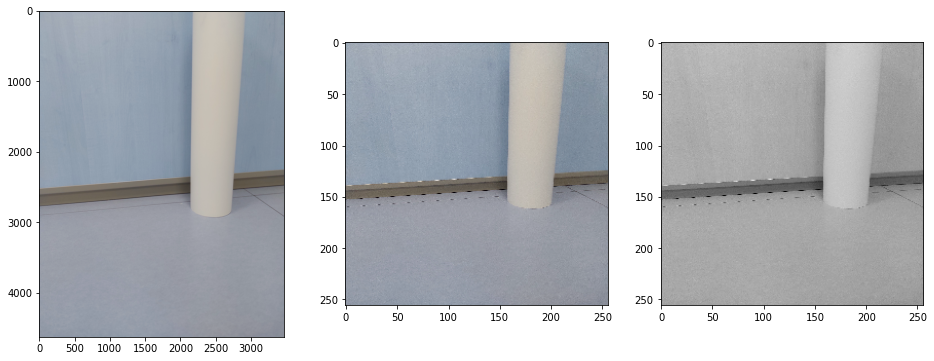

In [9]:
# Stablish path
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/DataSet'
print()

img_files = sorted( os.listdir( "pipe_img" ) )

index = random.randint(0, len(img_files) - 1)

img_size = 256

img1 = cv2.imread( "pipe_img" + "/" + img_files[index] )
img2 = cv2.resize(img1, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
img3 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.imshow( img1)
plt.subplot(132)
plt.imshow( img2)
plt.subplot(133)
plt.imshow( img3, cmap = "gray")
plt.show()

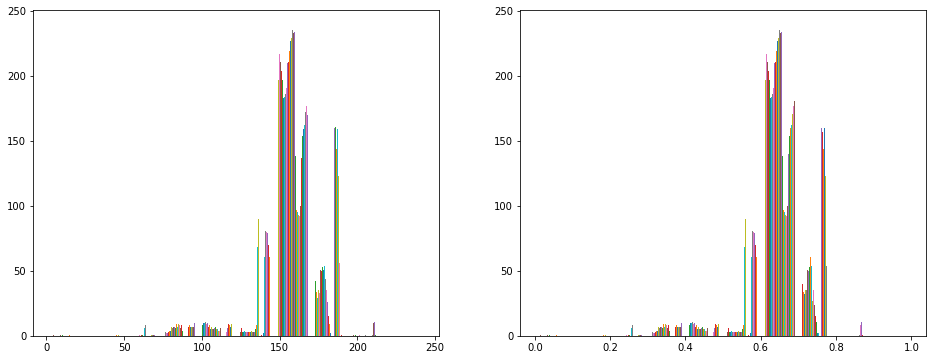

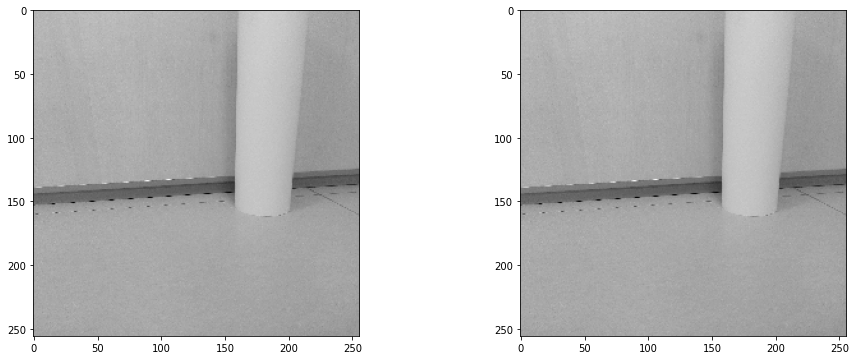

In [18]:
img4 = np.array( img3 , dtype = "float32")

a = img4.min()
img4 = img4 - a
b = img4.max()
img4 = img4 / b


plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.hist( img3 )
plt.subplot(122)
plt.hist( img4 )
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.imshow( img3, cmap = "gray")
plt.subplot(122)
plt.imshow( img4, cmap = "gray")
plt.show()